# Cluster Investigation

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb
!pip install missingno
import missingno as msno
from sklearn import preprocessing as p
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings

%matplotlib inline

color = sb.color_palette("Set2")[0]
palette = sb.color_palette("Set2")

## Gather & Clean Data

In [48]:
df = pd.read_csv('../data/cleaned_data_v2-combined_v1.csv', sep=',', index_col = 0)
df.head()


,EDAD,IDINGRESO,TA_MAX_PRIMERA_URG,TA_MIN_PRIMERA_URG,TEMP_PRIMERA_URG,FC_PRIMERA_URG,SAT_02_PRIMERA_URG,GLU_PRIMERA_URG,CREA--CREATININA,DD--DIMEROD,LIN--SISTEMATICODESANGRE,PCR--PROTEINACREACTIVA,PLAQ--SISTEMATICODESANGRE,FEMALE,MALE,DEATH,RECOVERED,RECOVERY_IN_PROGRESS
0,55,508,0,0,0.0,0,0,0,0.705,399.000000,2.290,6.080000,472.000000,0,1,0,1,0
1,54,509,0,0,0.0,0,0,0,0.800,398.000000,2.355,13.310000,657.000000,0,1,0,1,0
2,73,510,0,0,0.0,0,0,0,1.056,4396.750000,1.482,3.760000,306.000000,0,1,0,1,0
3,70,512,0,0,0.0,0,0,0,0.670,497.333333,1.395,21.986667,278.166667,1,0,0,0,1
4,61,513,0,0,0.0,0,0,0,0.670,470.000000,1.010,7.370000,318.000000,1,0,0,1,0


In [95]:
# Start cleaning on copied data
data = df.copy()
data.columns

Index(['EDAD', 'IDINGRESO', 'TA_MAX_PRIMERA_URG', 'TA_MIN_PRIMERA_URG',
       'TEMP_PRIMERA_URG', 'FC_PRIMERA_URG', 'SAT_02_PRIMERA_URG',
       'GLU_PRIMERA_URG', 'CREA--CREATININA', 'DD--DIMEROD',
       'LIN--SISTEMATICODESANGRE', 'PCR--PROTEINACREACTIVA',
       'PLAQ--SISTEMATICODESANGRE', 'FEMALE', 'MALE', 'DEATH', 'RECOVERED',
       'RECOVERY_IN_PROGRESS'],
      dtype='object')

In [99]:
# Feature Scaling
data_norm = p.MinMaxScaler(copy=False).fit_transform(data)
data_norm = pd.DataFrame(data_norm, columns = data.columns, index = data.index)
data_norm

,EDAD,IDINGRESO,TA_MAX_PRIMERA_URG,TA_MIN_PRIMERA_URG,TEMP_PRIMERA_URG,FC_PRIMERA_URG,SAT_02_PRIMERA_URG,GLU_PRIMERA_URG,CREA--CREATININA,DD--DIMEROD,LIN--SISTEMATICODESANGRE,PCR--PROTEINACREACTIVA,PLAQ--SISTEMATICODESANGRE,FEMALE,MALE,DEATH,RECOVERED,RECOVERY_IN_PROGRESS
0,0.518868,0.114550,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.033008,0.003650,0.023995,0.010341,0.526973,0.0,1.0,0.0,1.0,0.0
1,0.509434,0.114776,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.039407,0.003640,0.024697,0.023276,0.737081,0.0,1.0,0.0,1.0,0.0
2,0.688679,0.115002,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.056652,0.042876,0.015262,0.006190,0.338444,0.0,1.0,0.0,1.0,0.0
3,0.660377,0.115454,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.030650,0.004615,0.014321,0.038799,0.306833,1.0,0.0,0.0,0.0,1.0
4,0.575472,0.115680,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.030650,0.004347,0.010160,0.012649,0.352073,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,0.594340,0.403299,0.695455,0.101775,0.917706,0.500000,0.000000,0.0,0.051533,0.004651,0.019455,0.004419,0.235094,1.0,0.0,0.0,1.0,0.0
2064,0.716981,0.407592,0.645455,0.110059,0.885287,0.352632,0.939394,0.0,0.095318,0.025246,0.010268,0.145648,0.305508,1.0,0.0,1.0,0.0,0.0
2065,0.386792,0.406688,0.536364,0.094675,0.955112,0.547368,0.989899,0.0,0.050439,0.006280,0.008971,0.116343,0.137422,0.0,1.0,0.0,0.0,1.0
2066,0.424528,0.407140,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.029303,0.005838,0.009836,0.120315,0.293015,1.0,0.0,0.0,0.0,1.0


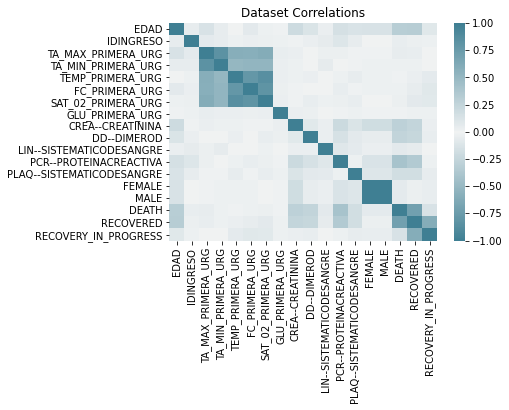

In [100]:
# Correlation Heatmap
cmap = sb.diverging_palette(220, 220, as_cmap=True)
sb.heatmap(data_norm.corr(), cmap = cmap);
plt.title('Dataset Correlations');
plt.savefig('../visualizations/dataset_correlations.png', bbox_inches='tight')

In [101]:
# Divide the data into training and test
data_list = data_norm.columns.drop(['DEATH', 'RECOVERED', 'RECOVERY_IN_PROGRESS', 'IDINGRESO'])

X = data_norm.loc[:,data_list]
y = data_norm.loc[:,['DEATH', 'RECOVERED', 'RECOVERY_IN_PROGRESS']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Clustering

In [ ]:
# Elbow function
def elbow(data, nr_centers):
    
    '''
    Objective: To find the optimal nr of centers for the data
    Inputs
        data = dataset
        nr_centers = range of nr of centers to test
    returns the score, eg the average distance of the points from the centers
    '''
    
    # Instantinate model
    model = KMeans(nr_centers)
    
    # Fit to data
    fit = model.fit(data)
    
    # Obtain the score for each model
    score = np.abs(model.score(data))
    
    return score

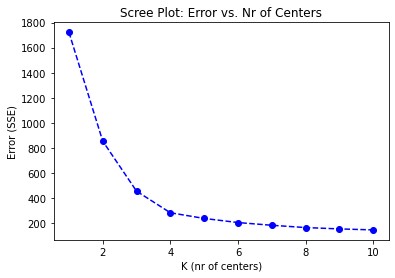

In [111]:
# Elobow method to choose nr of centers
scores =[]
centers = range(1,11)

for i in centers:
    scores.append(elbow(X_test,i))
    
# Plot the score against k
plt.plot(centers, scores, linestyle='--', marker='o', color='b')
plt.xlabel('K (nr of centers)')
plt.ylabel('Error (SSE)')
plt.title('Scree Plot: Error vs. Nr of Centers')
plt.savefig('../visualizations/scree_plot.png', bbox_inches='tight')

4 Clusters seem to describe the data best - Although all with high errors

In [110]:
# KM Model
nr_clusters = 4

# Instatinate model
model = KMeans(nr_clusters)

# Fit model
fit_model = model.fit(X_train)

# Predictions
y_pred = fit_model.predict(X_test)

print(f'Model error (SSE): {np.abs(round(fit_model.score(X_test),0))}')

Model error (SSE): 281.0
